In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
# read dataframe from GitHup
url = "https://github.com/MIT-Emerging-Talent/ET6-CDSP-group-08-repo/raw/refs/heads/main/1_datasets/cleaned_data/UN_comtrade_clean_dataset.xlsx"
new_df = pd.read_excel(url, engine="openpyxl")
new_df.head()

,Year,reporterISO,Country,Product_Code,Product_Description,Net_Weight_kg,Value_USD
0,2019,AFG,Afghanistan,854140,"Electrical apparatus; photosensitive, includin...",0.0,89932863.97
1,2007,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1796.0,26489.00
2,2008,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",1654.0,61941.00
3,2009,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",7822.0,269897.00
4,2010,CAF,Central African Rep.,854140,"Electrical apparatus; photosensitive, includin...",12346.0,173026.00


In [4]:
# Check the shape of the dataset (rows, columns)
print("Shape of dataset:", new_df.shape)

Shape of dataset: (781, 7)


In [5]:
# Get data types and non-null counts
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 781 non-null    int64  
 1   reporterISO          781 non-null    object 
 2   Country              781 non-null    object 
 3   Product_Code         781 non-null    int64  
 4   Product_Description  781 non-null    object 
 5   Net_Weight_kg        781 non-null    float64
 6   Value_USD            781 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.8+ KB


Descriptive Statistics

In [6]:
# Get summary statistics for numeric columns
new_df.describe()

,Year,Product_Code,Net_Weight_kg,Value_USD
count,781.000000,781.000000,7.810000e+02,7.810000e+02
mean,2015.530090,851609.829706,7.092923e+06,3.616844e+07
std,5.271177,1477.434037,4.203779e+07,1.287941e+08
min,2007.000000,850171.000000,0.000000e+00,7.802800e+01
25%,2011.000000,850440.000000,1.144590e+05,8.403230e+05
50%,2016.000000,850760.000000,9.247740e+05,5.789766e+06
75%,2020.000000,851310.000000,4.985596e+06,1.962766e+07
max,2024.000000,854143.000000,7.573800e+08,2.197252e+09


In [7]:
# Check for missing valuesprint("Missing values in each column:")
print(new_df.isnull().sum())

Year                   0
reporterISO            0
Country                0
Product_Code           0
Product_Description    0
Net_Weight_kg          0
Value_USD              0
dtype: int64


Data Distribution

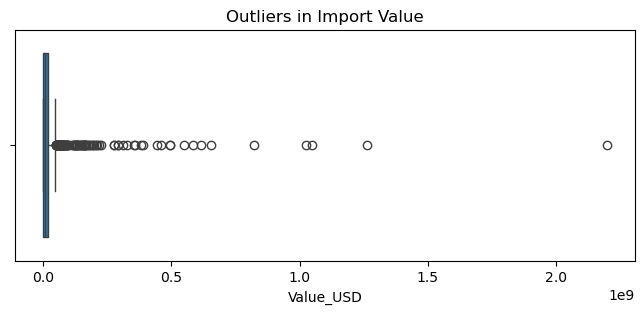

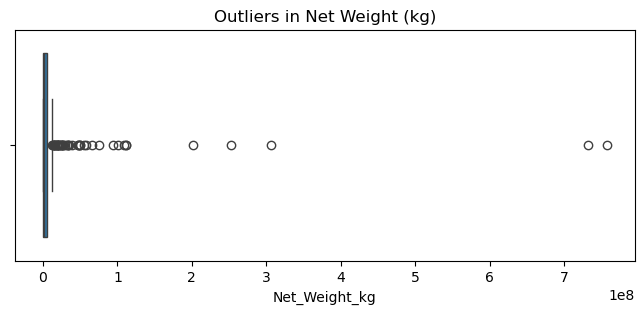

In [8]:
## Boxplot for Value_USD
plt.figure(figsize=(8, 3))
sns.boxplot(x=new_df["Value_USD"])
plt.title("Outliers in Import Value")
plt.show()

# Boxplot for Net_Weight_kg
plt.figure(figsize=(8, 3))
sns.boxplot(x=new_df["Net_Weight_kg"])
plt.title("Outliers in Net Weight (kg)")
plt.show()

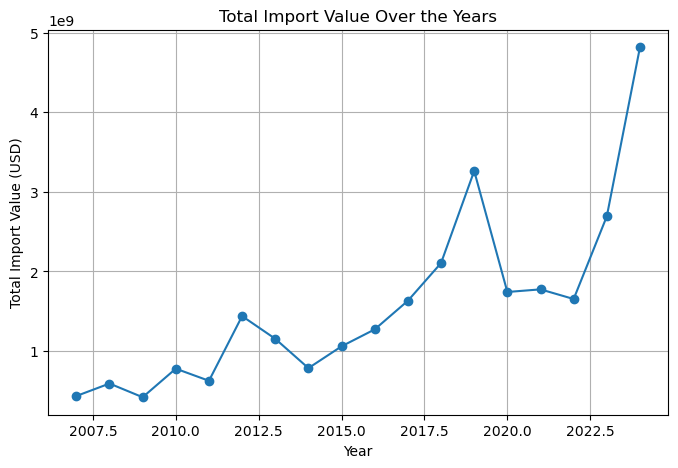

In [9]:
# Visualize the distribution of import values
yearly_trend = new_df.groupby("Year")["Value_USD"].sum()

plt.figure(figsize=(8, 5))
yearly_trend.plot(marker="o")
plt.title("Total Import Value Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Import Value (USD)")
plt.grid(True)
plt.show()

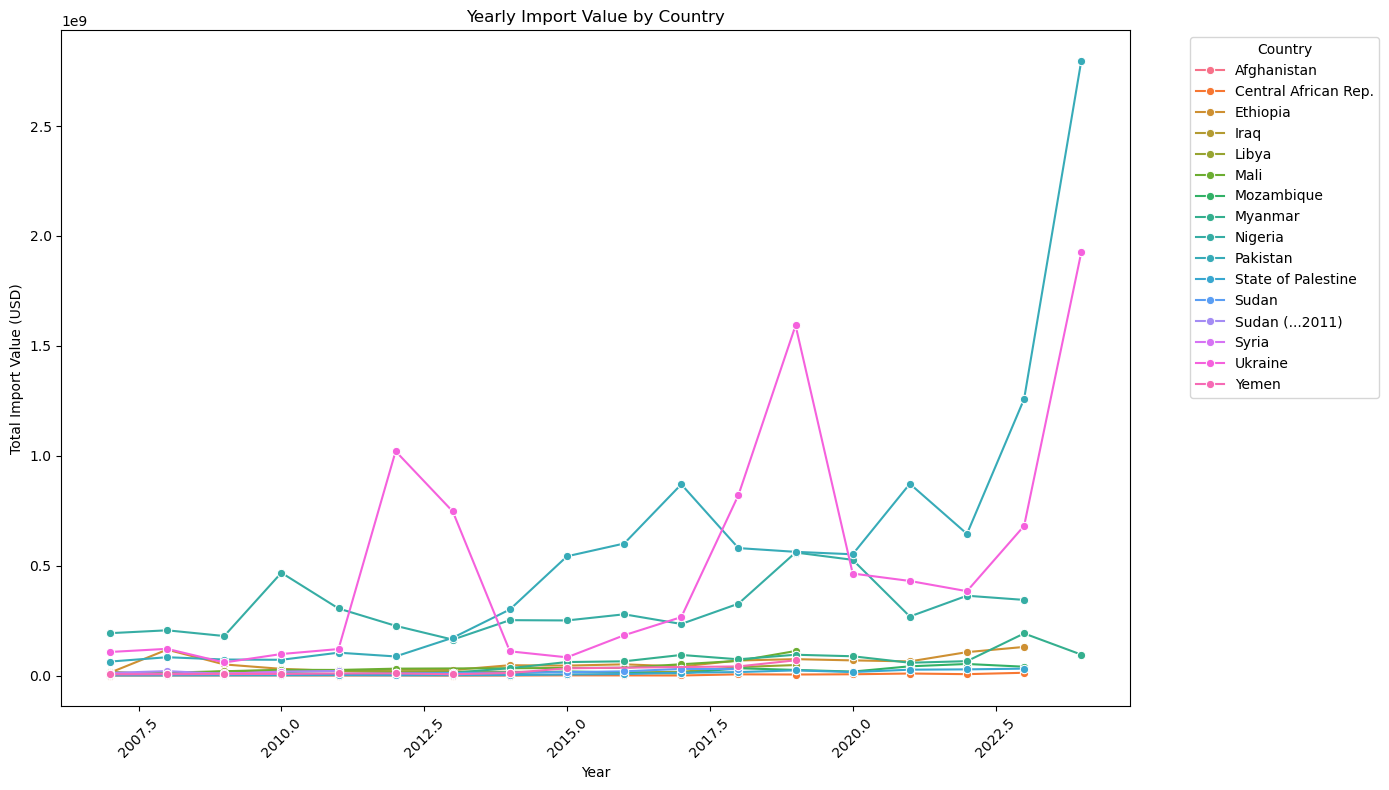

In [10]:
# Visualize the distribution of import values by country
grouped_all = new_df.groupby(["Country", "Year"])["Value_USD"].sum().reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_all, x="Year", y="Value_USD", hue="Country", marker="o")

plt.title("Yearly Import Value by Country")
plt.xlabel("Year")
plt.ylabel("Total Import Value (USD)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Country")
plt.tight_layout()
plt.show()

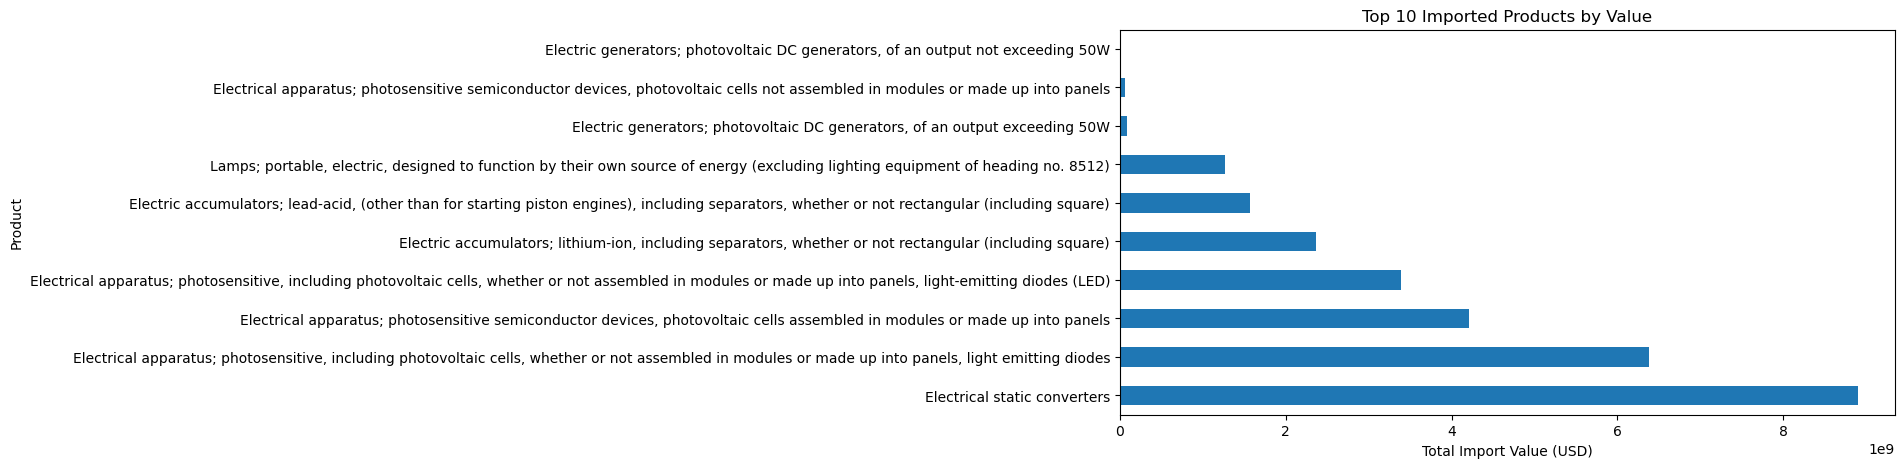

In [11]:
# Visualize the top 10 imported products by value
top_products = (
    new_df.groupby("Product_Description")["Value_USD"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
top_products.plot(kind="barh")
plt.title("Top 10 Imported Products by Value")
plt.xlabel("Total Import Value (USD)")
plt.ylabel("Product")
plt.show()

In [ ]:
# Filter the DataFrame to keep only specific product codes
product_codes_to_keep = [854140, 854142, 854143, 850171, 850172]

# 2. Filter the DataFrame using the .isin() method
# This creates a new DataFrame containing only the rows where 'Product_Code' is one of the values in the list.
filtered_df = new_df[new_df["Product_Code"].isin(product_codes_to_keep)]

In [ ]:
# Display the first few rows of the filtered DataFrame
del filtered_df["Product_Description"]
filtered_df.head()

,Year,reporterISO,Country,Product_Code,Net_Weight_kg,Value_USD
0,2019,AFG,Afghanistan,854140,0.0,89932863.97
1,2007,CAF,Central African Rep.,854140,1796.0,26489.00
2,2008,CAF,Central African Rep.,854140,1654.0,61941.00
3,2009,CAF,Central African Rep.,854140,7822.0,269897.00
4,2010,CAF,Central African Rep.,854140,12346.0,173026.00


In [ ]:
# Aggregate the data by Year, Country, and reporterISO
# and sum the Net_Weight_kg and Value_USD columns

aggregated_df = (
    filtered_df.groupby(["Year", "Country", "reporterISO"])[
        ["Net_Weight_kg", "Value_USD"]
    ]
    .sum()
    .reset_index()
)
aggregated_df.head(190)

,Year,Country,reporterISO,Net_Weight_kg,Value_USD
0,2007,Central African Rep.,CAF,1.796000e+03,2.648900e+04
1,2007,Ethiopia,ETH,6.513850e+03,1.768899e+05
2,2007,Libya,LBY,7.500000e+01,6.029000e+03
3,2007,Mali,MLI,2.755890e+05,1.890501e+06
4,2007,Mozambique,MOZ,7.092923e+06,1.542937e+06
...,...,...,...,...,...
173,2023,State of Palestine,PSE,7.092923e+06,1.591510e+07
174,2023,Ukraine,UKR,7.424970e+06,8.617447e+07
175,2024,Myanmar,MMR,2.598260e+07,5.602194e+07
176,2024,Pakistan,PAK,7.669890e+08,2.219008e+09


In [15]:
sorted_df = aggregated_df.sort_values(by="Country")
sorted_df.head(180)

,Year,Country,reporterISO,Net_Weight_kg,Value_USD
131,2019,Afghanistan,AFG,0.0,8.993286e+07
0,2007,Central African Rep.,CAF,1796.0,2.648900e+04
45,2011,Central African Rep.,CAF,30081.0,1.956920e+05
56,2012,Central African Rep.,CAF,26030.0,2.130460e+05
67,2013,Central African Rep.,CAF,2640.0,1.014400e+04
...,...,...,...,...,...
31,2009,Yemen,YEM,5074.0,6.677900e+04
130,2018,Yemen,YEM,6910976.0,3.944910e+07
10,2007,Yemen,YEM,4663.0,1.739300e+05
76,2013,Yemen,YEM,100209.0,3.408000e+05


## Charts: The Impact of Conflict Zones on Renewable Energy Adoption

The following visualizations explore how conflict zones may influence the adoption and spread of renewable energy technologies. By analyzing import values and trends for key products (such as solar panels and generators) in selected countries, we can observe patterns that may be linked to periods of conflict or instability. These charts help illustrate the relationship between geopolitical events and the uptake of sustainable energy solutions in affected regions.


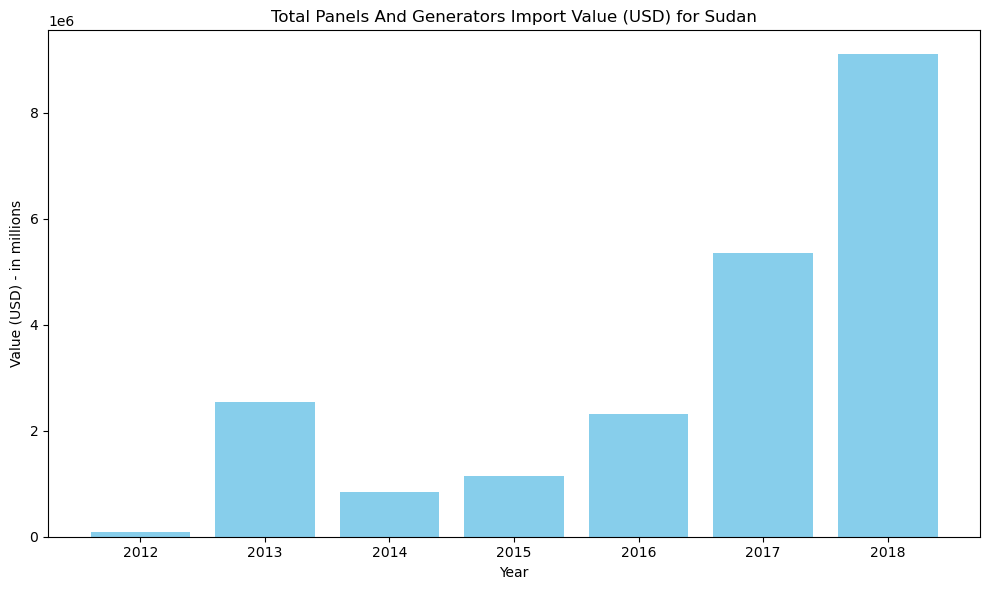

In [24]:
# --- Step 1: Isolate the data for a single country

country_to_plot = "Sudan"
country_df = aggregated_df.loc[aggregated_df["Country"] == country_to_plot].copy()

# sort by year before plotting to ensure the line connects points correctly.
country_df.sort_values("Year", inplace=True)


# --- Step 2: Create the plot ---

# --- Bar Chart of USD Value (Good for comparing specific years) ---
plt.figure(figsize=(10, 6))

plt.bar(
    country_df["Year"],  # X-axis
    country_df["Value_USD"],  # Bar heights
    color="skyblue",  # A nice blue color for bars
)

# Add titles and labels
plt.title(f"Total Panels And Generators Import Value (USD) for {country_to_plot}")
plt.xlabel("Year")
plt.ylabel("Value (USD) - in millions")
plt.xticks(country_df["Year"])
plt.tight_layout()

# Display the plot
plt.show()

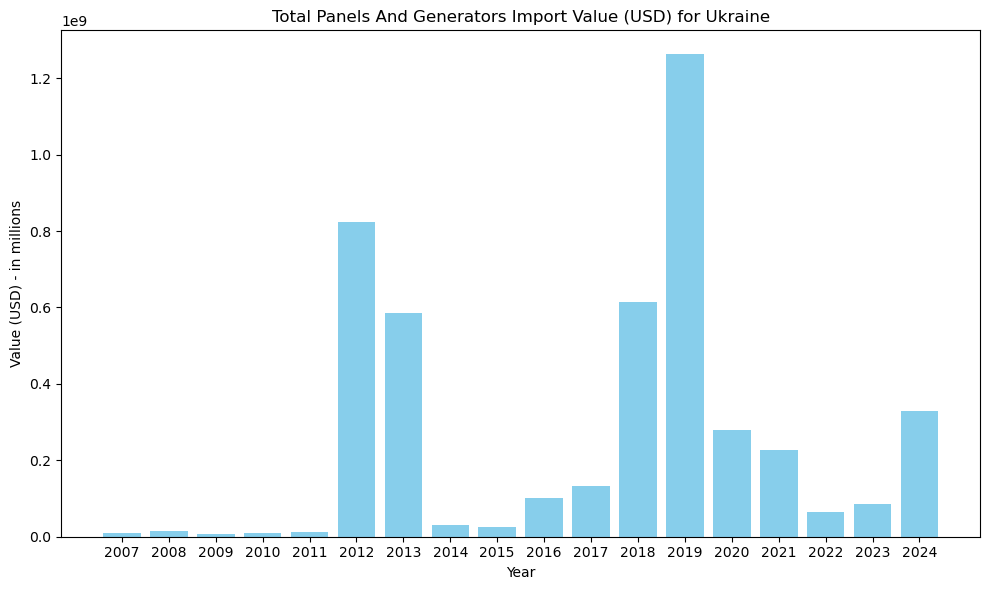

In [29]:
# --- Step 1: Isolate the data for a single country

country_to_plot = "Ukraine"
country_df = aggregated_df.loc[aggregated_df["Country"] == country_to_plot].copy()

# sort by year before plotting to ensure the line connects points correctly.
country_df.sort_values("Year", inplace=True)


# --- Step 2: Create the plot ---

# --- Bar Chart of USD Value (Good for comparing specific years) ---
plt.figure(figsize=(10, 6))

plt.bar(
    country_df["Year"],  # X-axis
    country_df["Value_USD"],  # Bar heights
    color="skyblue",  # A nice blue color for bars
)

# Add titles and labels
plt.title(f"Total Panels And Generators Import Value (USD) for {country_to_plot}")
plt.xlabel("Year")
plt.ylabel("Value (USD) - in millions")
plt.xticks(country_df["Year"])
plt.tight_layout()

# Display the plot
plt.show()

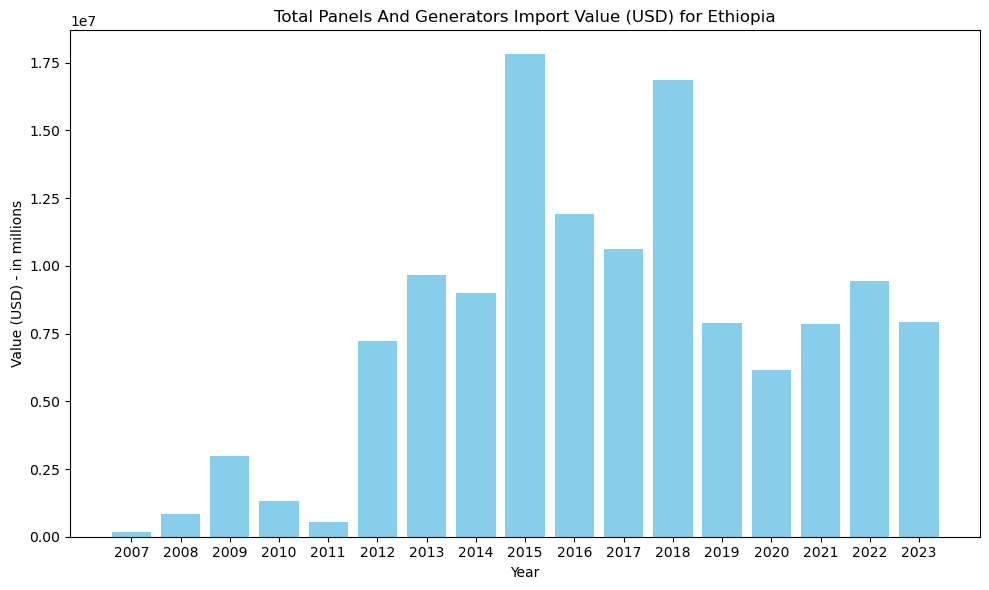

In [26]:
# --- Step 1: Isolate the data for a single country

country_to_plot = "Ethiopia"
country_df = aggregated_df.loc[aggregated_df["Country"] == country_to_plot].copy()

# sort by year before plotting to ensure the line connects points correctly.
country_df.sort_values("Year", inplace=True)


# --- Step 2: Create the plot ---

# --- Bar Chart of USD Value (Good for comparing specific years) ---
plt.figure(figsize=(10, 6))

plt.bar(
    country_df["Year"],  # X-axis
    country_df["Value_USD"],  # Bar heights
    color="skyblue",  # A nice blue color for bars
)

# Add titles and labels
plt.title(f"Total Panels And Generators Import Value (USD) for {country_to_plot}")
plt.xlabel("Year")
plt.ylabel("Value (USD) - in millions")
plt.xticks(country_df["Year"])
plt.tight_layout()

# Display the plot
plt.show()

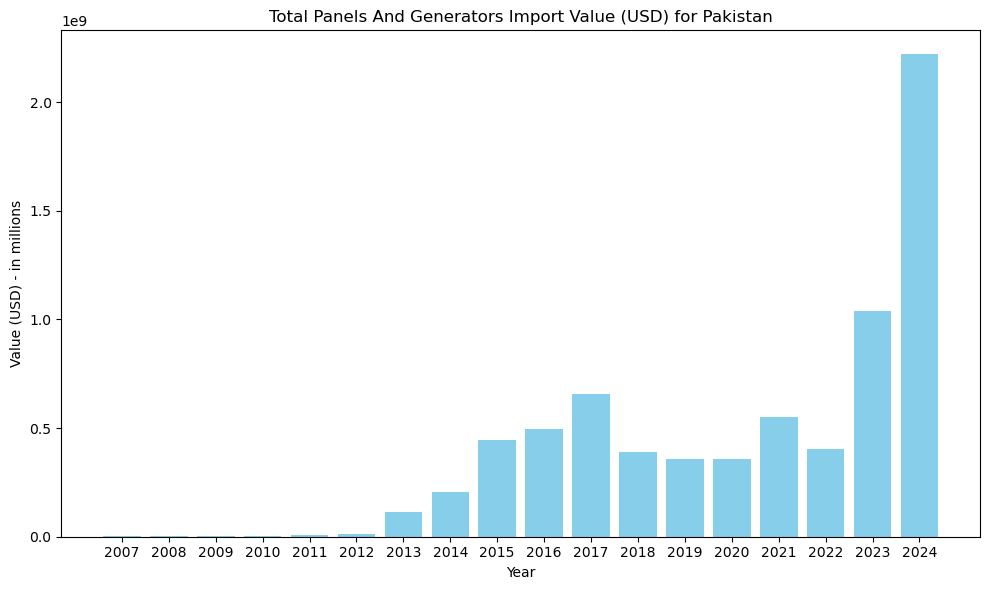

In [35]:
# --- Step 1: Isolate the data for a single country

country_to_plot = "Pakistan"
country_df = aggregated_df.loc[aggregated_df["Country"] == country_to_plot].copy()

# sort by year before plotting to ensure the line connects points correctly.
country_df.sort_values("Year", inplace=True)


# --- Step 2: Create the plot ---

# --- Bar Chart of USD Value (Good for comparing specific years) ---
plt.figure(figsize=(10, 6))

plt.bar(
    country_df["Year"],  # X-axis
    country_df["Value_USD"],  # Bar heights
    color="skyblue",  # A nice blue color for bars
)

# Add titles and labels
plt.title(f"Total Panels And Generators Import Value (USD) for {country_to_plot}")
plt.xlabel("Year")
plt.ylabel("Value (USD) - in millions")
plt.xticks(country_df["Year"])
plt.tight_layout()

# Display the plot
plt.show()